In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import hvplot.pandas
from scipy.stats import linregress
import json

In [79]:
file_path = "../Resources/VAERSDATA1 (3).csv"
covid_df = pd.read_csv(file_path)
covid_df.sample(20)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,VAX_MANU,HISTORY,ALLERGIES
330972,1300059,5/8/2021,IN,43,F,NaN,NaN,N,5/6/2021,5/8/2021,2.0,PVT,PFIZER\BIONTECH,Hypothyroidism High cholesterol,PCN CECHLOR SULPHA
139029,1536827,8/9/2021,NY,28,F,NaN,NaN,N,12/22/2020,12/27/2020,5.0,UNK,MODERNA,Medical History/Concurrent Conditions: No adve...,NaN
703664,2294209,5/25/2022,MD,68,M,NaN,NaN,N,3/12/2021,3/14/2021,2.0,UNK,PFIZER\BIONTECH,Comments: List of non-encoded Patient Relevant...,NaN
627555,2631041,5/12/2023,NaN,63,M,NaN,NaN,NaN,4/20/2022,10/26/2022,189.0,PVT,MODERNA,NaN,NaN
269769,2554040,1/9/2023,NY,38,F,NaN,NaN,Y,9/30/2022,9/30/2022,0.0,PHM,PFIZER\BIONTECH,NaN,NaN
490547,2674258,8/21/2023,NaN,54,F,NaN,NaN,U,9/8/2022,4/19/2023,223.0,PVT,MODERNA,NaN,NaN
798874,2592387,3/7/2023,TN,75,F,Y,3/5/2023,N,11/28/2022,2/1/2023,65.0,PVT,MODERNA,Sinusitis Hypertension Hyperlipidemia,NaN
237327,1626632,8/24/2021,CA,36,M,NaN,NaN,Y,4/10/2021,4/11/2021,1.0,UNK,MODERNA,NaN,NaN
746514,2237436,4/16/2022,FL,71,F,NaN,NaN,Y,12/29/2020,NaN,NaN,UNK,MODERNA,Medical History/Concurrent Conditions: Hashimo...,NaN
686116,1892899,11/23/2021,NaN,67,F,NaN,NaN,N,2/2/2021,9/1/2021,211.0,UNK,MODERNA,NaN,NaN


In [80]:
covid_df.drop(['NUMDAYS', 'V_ADMINBY', 'HISTORY', 'ALLERGIES'], axis=1, inplace=True)

covid_df.head()


,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,RECOVD,VAX_DATE,ONSET_DATE,VAX_MANU
0,1021156,2/10/2021,IL,32,F,NaN,NaN,N,1/27/2021,2/4/2021,MODERNA
1,1029567,2/14/2021,NH,61,M,NaN,NaN,U,2/14/2021,2/14/2021,MODERNA
2,1061353,2/28/2021,WA,74,M,NaN,NaN,N,2/24/2021,2/24/2021,PFIZER\BIONTECH
3,1066793,3/2/2021,AZ,81,M,NaN,NaN,N,2/12/2021,2/26/2021,PFIZER\BIONTECH
4,1219181,4/16/2021,TX,15,M,NaN,NaN,Y,4/15/2021,4/15/2021,PFIZER\BIONTECH


In [81]:
# #total count of vaccines administered by manufacturer
vaccine_counts = covid_df.groupby('VAX_MANU').size().reset_index(name='Total_Vaccines_Administered')

# vaccine_counts

# Add a total count row for all vaccines administered
total_vaccines = vaccine_counts['Total_Vaccines_Administered'].sum()
total_row = pd.DataFrame([["TOTAL", total_vaccines]], columns=vaccine_counts.columns)

# Append the total row
vaccine_counts = pd.concat([vaccine_counts, total_row], ignore_index=True)

# Display the updated dataframe
vaccine_counts



,VAX_MANU,Total_Vaccines_Administered
0,JANSSEN,53687
1,MODERNA,408657
2,NOVAVAX,300
3,PFIZER\BIONTECH,413910
4,UNKNOWN MANUFACTURER,19975
5,TOTAL,896529


In [82]:
# Adverse Reactions (cases where 'RECOVD' is NOT 'Y')
adverse_reactions_df = covid_df[(covid_df['RECOVD'] != 'Y')]

# Unknown Cases (cases where 'RECOVD' == 'U')
unknown_cases_df = covid_df[covid_df['RECOVD'] == 'U']

# Separate deaths
deaths_df = covid_df[covid_df['DIED'] == 'Y']

# Group by manufacturer for adverse reactions
adverse_reactions_by_manufacturer = adverse_reactions_df.groupby('VAX_MANU').size().reset_index(name='Adverse_Reactions')

# Group by manufacturer for deaths
deaths_by_manufacturer = deaths_df.groupby('VAX_MANU').size().reset_index(name='Deaths')

# Group by manufacturer for unknown cases
unknown_cases_by_manufacturer = unknown_cases_df.groupby('VAX_MANU').size().reset_index(name='Unknown_Cases')

# Merge all summaries
summary_df = adverse_reactions_by_manufacturer.merge(deaths_by_manufacturer, on='VAX_MANU', how='outer').merge(
    unknown_cases_by_manufacturer, on='VAX_MANU', how='outer'
).fillna(0)

# Convert to integers
summary_df[['Adverse_Reactions', 'Deaths', 'Unknown_Cases']] = summary_df[['Adverse_Reactions', 'Deaths', 'Unknown_Cases']].astype(int)

# Calculate Unknown Percentage
summary_df['Unknown_Percentage'] = (summary_df['Unknown_Cases'] / summary_df['Adverse_Reactions']) * 100
summary_df['Unknown_Percentage'] = summary_df['Unknown_Percentage'].fillna(0).round(2)  # Round to 2 decimal places

summary_df





,VAX_MANU,Adverse_Reactions,Deaths,Unknown_Cases,Unknown_Percentage
0,JANSSEN,35521,1317,9065,25.52
1,MODERNA,268139,7563,90090,33.60
2,NOVAVAX,218,0,49,22.48
3,PFIZER\BIONTECH,287050,7403,76315,26.59
4,UNKNOWN MANUFACTURER,13543,623,3995,29.50


In [83]:
#adverse reaction %
adverse_percentage_df = vaccine_counts.merge(adverse_reactions_by_manufacturer, on='VAX_MANU', how='left').fillna(0)

adverse_percentage_df['Adverse_Reaction_Percentage'] = (adverse_percentage_df['Adverse_Reactions'] / adverse_percentage_df['Total_Vaccines_Administered']) * 100

adverse_percentage_df

,VAX_MANU,Total_Vaccines_Administered,Adverse_Reactions,Adverse_Reaction_Percentage
0,JANSSEN,53687,35521.0,66.163131
1,MODERNA,408657,268139.0,65.614684
2,NOVAVAX,300,218.0,72.666667
3,PFIZER\BIONTECH,413910,287050.0,69.350825
4,UNKNOWN MANUFACTURER,19975,13543.0,67.799750
5,TOTAL,896529,0.0,0.000000


In [84]:
# Ensure 'Deaths' data is included
death_percentage_df = vaccine_counts.merge(deaths_by_manufacturer, on='VAX_MANU', how='left').fillna(0)

# Correctly calculate Deaths Percentage
death_percentage_df['Deaths_Percentage'] = (death_percentage_df['Deaths'] / vaccine_counts['Total_Vaccines_Administered']) * 100

# Fill NaN values and round
death_percentage_df['Deaths_Percentage'] = death_percentage_df['Deaths_Percentage'].fillna(0).round(2)

death_percentage_df




,VAX_MANU,Total_Vaccines_Administered,Deaths,Deaths_Percentage
0,JANSSEN,53687,1317.0,2.45
1,MODERNA,408657,7563.0,1.85
2,NOVAVAX,300,0.0,0.00
3,PFIZER\BIONTECH,413910,7403.0,1.79
4,UNKNOWN MANUFACTURER,19975,623.0,3.12
5,TOTAL,896529,0.0,0.00


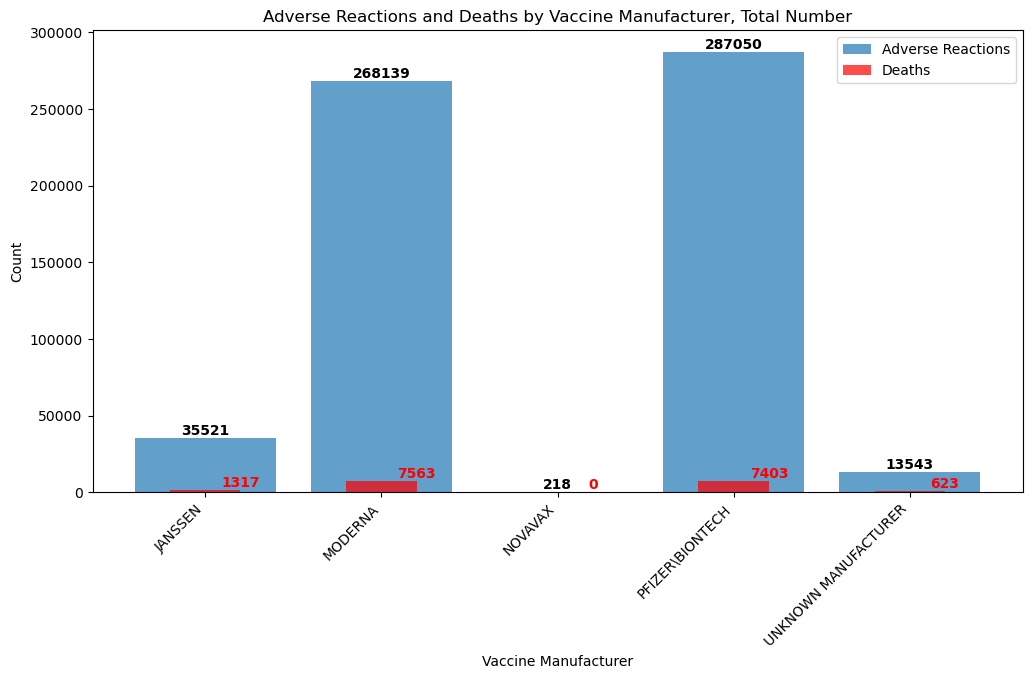

In [97]:
# Adjusting the NOVAVAX bar to separate Adverse Reactions and Deaths more clearly

plt.figure(figsize=(12, 6))
x_labels = summary_df['VAX_MANU']

# Plot Adverse Reactions
bars1 = plt.bar(x_labels, summary_df['Adverse_Reactions'], label="Adverse Reactions", alpha=0.7)

# Plot Deaths slightly offset for clarity
bar_width = 0.4  # Offset width
bars2 = plt.bar(x_labels, summary_df['Deaths'], label="Deaths", alpha=0.7, color='red', width=bar_width)

# Add numbers above the bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 + bar_width/2, yval, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')

# Labels and title
plt.xlabel("Vaccine Manufacturer")
plt.ylabel("Count")
plt.title("Adverse Reactions and Deaths by Vaccine Manufacturer, Total Number")
plt.xticks(rotation=45, ha='right')
plt.legend()

file_path = "adverse_reactions_death_number.png"
plt.savefig(file_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()


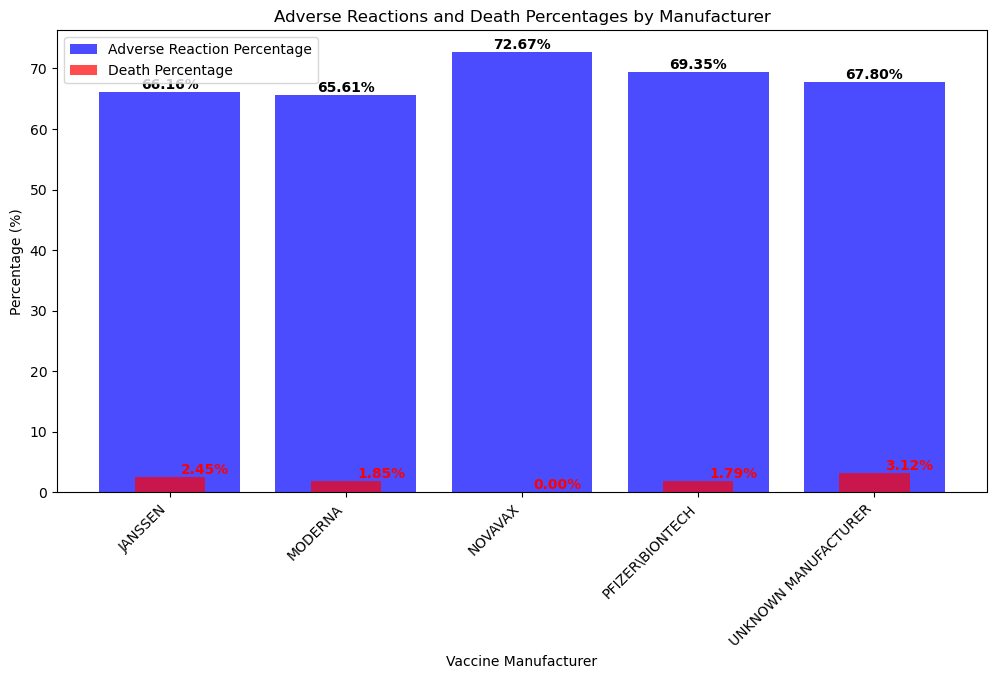

In [96]:
import matplotlib.pyplot as plt

# Merge both percentage data into a single dataframe for plotting
percentage_df = adverse_percentage_df[['VAX_MANU', 'Adverse_Reaction_Percentage']].merge(
    death_percentage_df[['VAX_MANU', 'Deaths_Percentage']], on='VAX_MANU', how='left'
).fillna(0)

# Remove the "Total" row if it exists
percentage_df = percentage_df[percentage_df['VAX_MANU'].str.lower() != 'total']

# Create the bar chart using the merged dataframe
plt.figure(figsize=(12, 6))
x_labels = percentage_df['VAX_MANU']

# Plot Adverse Reactions Percentage
bars1 = plt.bar(x_labels, percentage_df['Adverse_Reaction_Percentage'], label="Adverse Reaction Percentage", alpha=0.7, color='blue')

# Plot Death Percentage slightly offset for clarity
bar_width = 0.4  # Offset width
bars2 = plt.bar(x_labels, percentage_df['Deaths_Percentage'], label="Death Percentage", alpha=0.7, color='red', width=bar_width)

# Add numbers above the bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 + bar_width/2, yval, f"{yval:.2f}%", ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')

# Labels and title
plt.xlabel("Vaccine Manufacturer")
plt.ylabel("Percentage (%)")
plt.title("Adverse Reactions and Death Percentages by Manufacturer")
plt.xticks(rotation=45, ha='right')
plt.legend()

file_path = "adverse_reactions_death_percentages.png"
plt.savefig(file_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

